# Week 2 - Preprocessing, part 2

# 1. Lesson: None

### Group #62. My Project title: The Hidden Cost of Overproducing STEM Graduate

This project examines the education-to-employment pipeline for STEM fields, emphasizing enrollment trends, workforce absorption, and labor-market alignment at an institutional and policy level rather than individual career outcomes.

Datasets Used

1) 2025 Gallup Winter Survey (Teachers)
    Gallup, Inc. via AEP Data Portal (permission-based access)

    https://www.aepdata.org


2) Current Term Enrollment Estimates
    National Student Clearinghouse Research Center

    https://nscresearchcenter.org/current-term-enrollment-estimates/
    

3) National Survey of College Graduates (NSCG)
    National Science Foundation, National Center for Science and Engineering Statistics
    
    https://ncses.nsf.gov/explore-data/microdata/national-survey-college-graduates

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

Using the NSCG dataset, and the summary on their website, this dataset is about:

| Element | Description |
|---------|-------------|
| **WHO** | **Primary**: Policymakers (NSF, government agencies) making STEM workforce decisions<br>**Secondary**: University administrators, researchers, journalists, and students |
| **WHAT** | **30 years** (1993-2023) of U.S. college graduate careers, focusing on:<br>• Occupation evolution (including 2023 psychology code split)<br>• Geographic distribution of STEM talent<br>• Educational pathways and financing impacts |
| **HOW** | **Visualizations**: Animated timelines, interactive maps, Sankey diagrams<br>**Features**: Year slider, field filters, data correction annotations<br>**Narrative**: Track STEM workforce evolution with transparent methodology |

Source: https://ncses.nsf.gov/explore-data/microdata/national-survey-college-graduates

# 3. Homework - work with your own data

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Preprare the dataset for analysis

# Note: This file is extracted to the same directory as this notebook
# Link to the dataset: https://ncses.nsf.gov/822/assets/0/files/college_grads_2023.zip
# Link to the data set on Google drive: https://drive.google.com/file/d/14f4twyyrD5ad8uYUqs1HlBi0WrrqA7hk/view?usp=drive_link

df = pd.read_csv('epcg23.zip')

D:\Users\Dustin\AppData\Local\Temp\ipykernel_27900\1434504148.py:7: DtypeWarning: Columns (231,232,233,234,235,236,237,238,239) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('epcg23.zip')


This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [4]:
# Summarize the datasets using info() and describe()

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94606 entries, 0 to 94605
Columns: 548 entries, ACADV to WTSURVY
dtypes: float64(1), int64(190), object(357)
memory usage: 395.5+ MB


,AGE,AGEGR,BAACYR,BAAYR3,BAAYR5,BAMN,BAST_TOGA,BAYR,BIRYR,BSDGN,...,STRTYR,SUPDIR,SUPIND,SURID,UGLOANR,UGOWER,VETSTAT,WKSLYR,WKSWK,WTSURVY
count,94606.000000,94606.000000,94606.000000,94606.000000,94606.000000,94606.000000,94606.000000,94606.000000,94606.000000,94606.000000,...,94606.000000,94606.000000,94606.000000,94606.0,94606.000000,94606.000000,94606.000000,94606.000000,94606.000000,94606.000000
mean,44.072152,42.051297,2554.012187,2552.838921,2551.912712,12.664281,182.169429,2553.779972,1977.467148,1.608725,...,3265.163869,6579.301651,65790.220271,1.0,3.885272,2.573431,0.132328,92.513540,57.826100,757.847319
std,14.525669,14.530836,2027.126833,2027.446385,2027.698788,23.370612,229.799750,2027.189977,14.373948,0.714325,...,2900.141623,4740.293192,47431.993413,0.0,2.679065,1.788486,0.598170,17.758709,18.087375,1735.524465
min,19.000000,20.000000,1963.000000,1962.000000,1960.000000,1.000000,99.000000,1963.000000,1947.000000,1.000000,...,1967.000000,1.000000,0.000000,1.0,1.000000,1.000000,0.000000,1.000000,1.000000,0.974800
25%,32.000000,30.000000,1993.000000,1992.000000,1990.000000,5.000000,99.000000,1993.000000,1965.000000,1.000000,...,2015.000000,6.000000,6.000000,1.0,2.000000,2.000000,0.000000,98.000000,52.000000,72.428575
50%,41.000000,40.000000,2008.000000,2007.000000,2005.000000,5.000000,99.000000,2007.000000,1981.000000,1.000000,...,2020.000000,9998.000000,99998.000000,1.0,3.000000,2.000000,0.000000,98.000000,52.000000,208.317450
75%,56.000000,55.000000,2015.000000,2013.000000,2015.000000,8.000000,99.000000,2015.000000,1990.000000,2.000000,...,2022.000000,9998.000000,99998.000000,1.0,5.000000,2.000000,0.000000,98.000000,52.000000,705.891000
max,75.000000,70.000000,9999.000000,9999.000000,9999.000000,98.000000,998.000000,9999.000000,2002.000000,6.000000,...,9998.000000,9998.000000,99998.000000,1.0,12.000000,12.000000,3.000000,98.000000,98.000000,72566.046200


Since there are so many acronyms, the dataset includeed an Excel file to descript the column names. I've converted it to a CVS for easier processing. 
This file (Dpcg23.csv) is extracted to the same directory as this notebook

In [5]:
# Load the data dictionary
dict_df = pd.read_csv('Dpcg23.csv')

print("Data Dictionary Shape:", dict_df.shape)
print("\nFirst few rows:")
print(dict_df[["SAS_NAME", "DESCRIPTION"]].head())
print("\nColumn names:")
print(dict_df.columns.tolist())

Data Dictionary Shape: (548, 7)

First few rows:
  SAS_NAME                                        DESCRIPTION
0    ACADV  Reason for taking courses during reference wee...
1    ACCAR  Reason for taking courses during reference wee...
2   ACCCEP  School related costs for course taking paid by...
3    ACCHG  Reason for taking courses during reference wee...
4    ACDRG    Type of degree working on during reference week

Column names:
['SAS_NAME', 'SESTAT_NAME', 'DESCRIPTION', 'SOURCE', 'QUESTION', 'DOMAIN', 'SAS_FMT']


In [6]:
# We now can look at any column name and understand what it means by looking at the dat dictionary

def lookup_col(col_name):

    result = dict_df[dict_df['SAS_NAME'] == col_name.upper()]
    if len(result) > 0:
        row = result.iloc[0]
        print(f"\nColumn Name: {col_name}")
        print(f"Description: {row['DESCRIPTION']}")
        print(f"Domain: {row['DOMAIN']}")
        print(f"Question: {row['QUESTION']}")
        
    else:
        print(f"Column '{col_name}' not found")

# Looking up the column names in the data dictionary to understand what they mean
lookup_col('AGE')
lookup_col('N2BAMED')
lookup_col('EARN')

# We can look up any column name using the same format above.


Column Name: AGE
Description: Age
Domain: All respondents
Question: Derived within SESTAT from reported information

Column Name: N2BAMED
Description: Field of study of for first bachelor's degree - best code
Domain: All respondents
Question: What is the major field of study for your first BA degree? (best code)

Column Name: EARN
Description: Total earned income before deductions in previous year
Domain: Worked during calendar year 2020
Question: Counting all jobs held in 2020, what was your total earned income for 2020, before deductions?


In [7]:
# Get some real data insights by looking at the distribution of earnings (EARN) and field of study (N2BAMED)

def currency_formatter(x, p):
    return f'${x:,.0f}'

# Calculate earnings statistics by field
field_stats = df.groupby('N2BAMED')['EARN'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).round(0)

# Filter for fields with median earnings > $100,000
high_earners = field_stats[field_stats['median'] > 100000].copy()

# Sort by median earnings (highest first)
high_earners = high_earners.sort_values('median', ascending=False)

print("=== FIELDS WITH MEDIAN EARNINGS > $100K ===")
print(f"Total fields above $100K: {len(high_earners)}")
print(f"\nTop 10 fields (by median earnings):")
print(high_earners.head(10))

=== FIELDS WITH MEDIAN EARNINGS > $100K ===
Total fields above $100K: 45

Top 10 fields (by median earnings):
         count       mean    median        std    min      max
N2BAMED                                                       
577380      18  2893457.0  206000.0  4535558.0  70000  9999998
577400      24  1884959.0  156000.0  3721915.0   1000  9999998
128430      57  1561255.0  148000.0  3446697.0   8400  9999998
547270    1331   544197.0  147000.0  1857127.0      0  9999998
547280    4625  1067219.0  140000.0  2845492.0      0  9999998
116730    3610   901942.0  138000.0  2588069.0      0  9999998
577360      69  1278143.0  135000.0  3182692.0      0  9999998
517210     659   765677.0  130000.0  2412672.0   1000  9999998
527250    1838  1086219.0  130000.0  2903810.0      0  9999998
577290     234  1188180.0  130000.0  3055192.0   3000  9999998


**Issue(s)**

As you can see above, these N2BAMED codes correspond to specific fields of study. 
We can look them up in the data dictionary to understand what they are. 
All fields were just numbers (e.g., 766620) - meaningless to audience.
I created mapping `N2BAMED.csv` (value/description) from PDF file `Ppcg23.pdf`to add actual field names


In [8]:
N2BAMED_df = pd.read_csv('N2BAMED.csv')
N2BAMED_df.head(10)

,Value,Description
0,116710,Computer and information sciences general
1,116730,Computer science
2,116740,Computer systems analysis
3,116760,Information science studies
4,116770,Other computer and information sciences
5,128410,Applied mathematics
6,128420,Mathematics general
7,128430,Operations research
8,128440,Statistics
9,128450,Other mathematics


In [9]:
# Are there any duplicate rows?

duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")


Number of duplicate rows: 0


In [10]:
# What are the mean, median, and mode of each column?

mean_values = df.mean(numeric_only=True)
median_values = df.median(numeric_only=True)
mode_values = df.mode(numeric_only=True)

# Print the results
print("Mean values:\n", mean_values)
print("Median values:\n", median_values)
print("Mode values:\n", mode_values)

Mean values:
 AGE          44.072152
AGEGR        42.051297
BAACYR     2554.012187
BAAYR3     2552.838921
BAAYR5     2551.912712
              ...     
UGOWER        2.573431
VETSTAT       0.132328
WKSLYR       92.513540
WKSWK        57.826100
WTSURVY     757.847319
Length: 191, dtype: float64
Median values:
 AGE          41.00000
AGEGR        40.00000
BAACYR     2008.00000
BAAYR3     2007.00000
BAAYR5     2005.00000
              ...    
UGOWER        2.00000
VETSTAT       0.00000
WKSLYR       98.00000
WKSWK        52.00000
WTSURVY     208.31745
Length: 191, dtype: float64
Mode values:
         AGE  AGEGR  BAACYR  BAAYR3  BAAYR5  BAMN  BAST_TOGA    BAYR   BIRYR  \
0      32.0   30.0  9998.0  2013.0  2010.0   5.0       99.0  9998.0  1990.0   
1       NaN    NaN     NaN     NaN     NaN   NaN        NaN     NaN     NaN   
2       NaN    NaN     NaN     NaN     NaN   NaN        NaN     NaN     NaN   
3       NaN    NaN     NaN     NaN     NaN   NaN        NaN     NaN     NaN   
4       Na

These numbers above has absolute no meaning to the analysis. Not helpful

In [11]:
# Are there any missing or null values?

missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 ACADV      0
ACCAR      0
ACCCEP     0
ACCHG      0
ACDRG      0
          ..
WTROPPS    0
WTROT      0
WTRPERS    0
WTRSKL     0
WTSURVY    0
Length: 548, dtype: int64


In [12]:
# Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)
if 'BIRYR' in df.columns:
    # Current year for reference (assuming survey was 2023)
    current_year = 2023
    
    # Check for birth years in the future
    future_birth = df[df['BIRYR'] > current_year]
    print(f"People born in the future (>2023): {len(future_birth)}")
    if len(future_birth) > 0:
        print(future_birth[['BIRYR']].head())
    
    # Check for impossibly old (born before 1900)
    too_old = df[df['BIRYR'] < 1900]
    print(f"\nPeople born before 1900 (>123 years old): {len(too_old)}")
    if len(too_old) > 0:
        print(too_old[['BIRYR']].head())
    
    # Check for missing/invalid (0 or negative)
    invalid_birth = df[df['BIRYR'] <= 0]
    print(f"\nInvalid birth years (<=0): {len(invalid_birth)}")        

People born in the future (>2023): 0

People born before 1900 (>123 years old): 0

Invalid birth years (<=0): 0


In [13]:
# There are some very high earnings values that are likely data entry errors (e.g. 9999999). 
# I'll identify and remove these outliers before analysis.

# Identify the invalid max values
invalid_mask = df['EARN'] >= 9999990  # Values close to 10 million
invalid_count = invalid_mask.sum()
print(f"Found {invalid_count} rows with earnings >= 9,999,990 ({invalid_count/len(df)*100:.2f}% of data)")

# Show these rows
invalid_rows = df[invalid_mask]
print("\nSample of invalid earnings rows:")
print(invalid_rows[['EARN'] + [c for c in ['AGE', 'N2BAMED'] if c in df.columns]].head(10))

# Remove them
df_clean = df[~invalid_mask].copy()
print(f"\nRemoved {invalid_count} invalid rows")
print(f"New dataset shape: {df_clean.shape}")

Found 10820 rows with earnings >= 9,999,990 (11.44% of data)

Sample of invalid earnings rows:
        EARN  AGE  N2BAMED
4    9999998   37   759260
18   9999998   38   429280
27   9999998   58   547280
29   9999998   70   766620
30   9999998   59   617900
39   9999998   48   226320
44   9999998   74   716530
57   9999998   38   999989
79   9999998   66   617910
133  9999998   58   128440

Removed 10820 invalid rows
New dataset shape: (83786, 548)


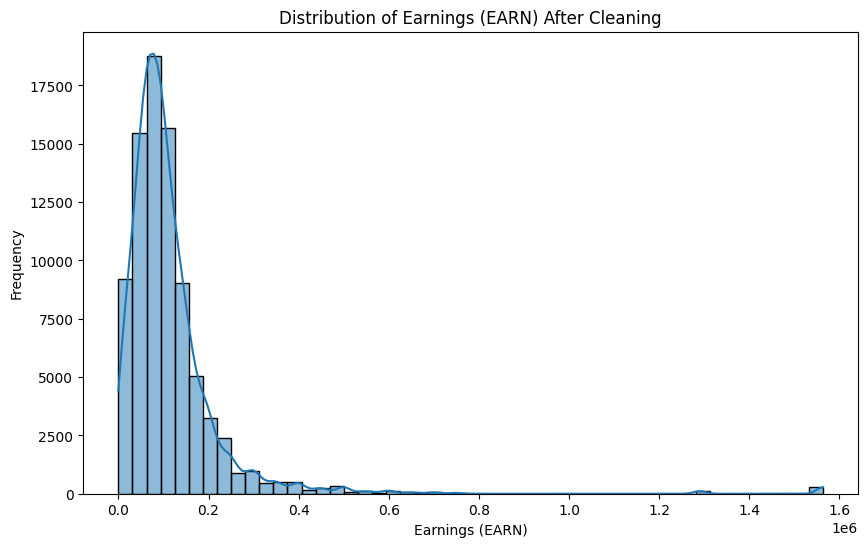

In [14]:
# Verfy the earnings distribution after cleaning
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['EARN'], bins=50, kde=True)
plt.title('Distribution of Earnings (EARN) After Cleaning')
plt.xlabel('Earnings (EARN)')
plt.ylabel('Frequency')
plt.show()

In [15]:
# The graph still shows a long tail of high earners, but the extreme outliers have been removed
# I'll attempt to clean the data further by removing values above the 99th percentile

earnings_99th = df_clean['EARN'].quantile(0.99)
print(f"99th percentile of earnings: ${earnings_99th:,.0f}")

# remove values above the 99th percentile
df_clean_99 = df_clean[df_clean['EARN'] <= earnings_99th].copy()
print(f"Removed {len(df_clean) - len(df_clean_99)} rows above the 99th percentile")
print(f"New dataset shape after 99th percentile cleaning: {df_clean_99.shape}") 


99th percentile of earnings: $550,000
Removed 809 rows above the 99th percentile
New dataset shape after 99th percentile cleaning: (82977, 548)


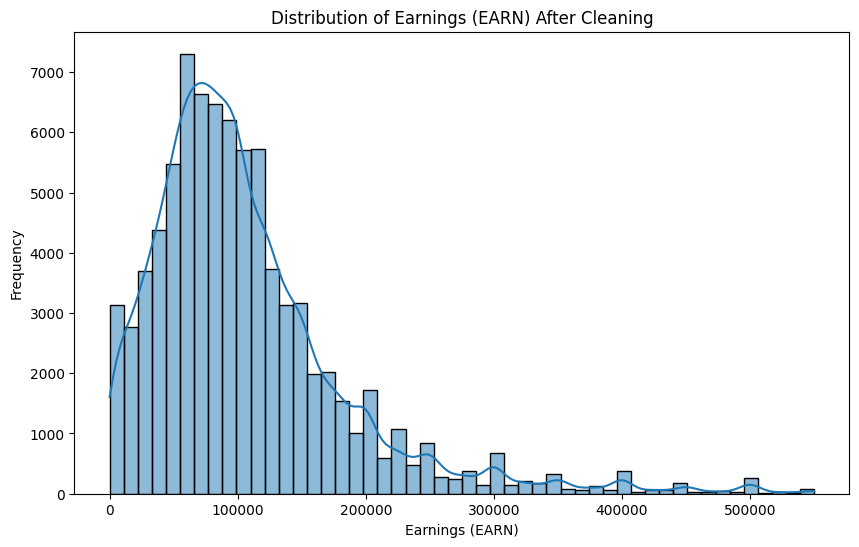

In [16]:
# Verfy the earnings distribution after cleaning
plt.figure(figsize=(10, 6))
sns.histplot(df_clean_99['EARN'], bins=50, kde=True)
plt.title('Distribution of Earnings (EARN) After Cleaning')
plt.xlabel('Earnings (EARN)')
plt.ylabel('Frequency')
plt.show()

In [17]:
# Encode any categorical variables (e.g. with one-hot encoding.)

# Select all columns with dtype 'object' (typically string/categorical columns)
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply one-hot encoding to these columns
# drop_first=True removes one category per column to avoid multicollinearity
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

print("Encoded dataset shape:", df_encoded.shape)
print(f"Original columns: {len(df.columns)} \nEncoded columns: {len(df_encoded.columns)}")

Encoded dataset shape: (94606, 1333)
Original columns: 548 
Encoded columns: 1333


# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

Top 15 fields by average earnings:
     N2BAMED  EARN_mean  AGE_mean  count
60    547270   162326.0      37.0   1250
61    547280   149963.0      44.0   4139
1     116730   147242.0      39.0   3262
7     128430   145959.0      41.0     47
97    646520   142570.0      35.0    151
68    577310   141073.0      43.0    135
56    517210   134769.0      38.0    616
57    527250   134548.0      42.0   1649
70    577360   134293.0      50.0     61
8     128440   132229.0      39.0    289
103   716570   131718.0      41.0    551
72    577390   131570.0      37.0     90
36    419230   131346.0      42.0   2259
66    577290   131173.0      40.0    208
22    226390   130678.0      44.0     43


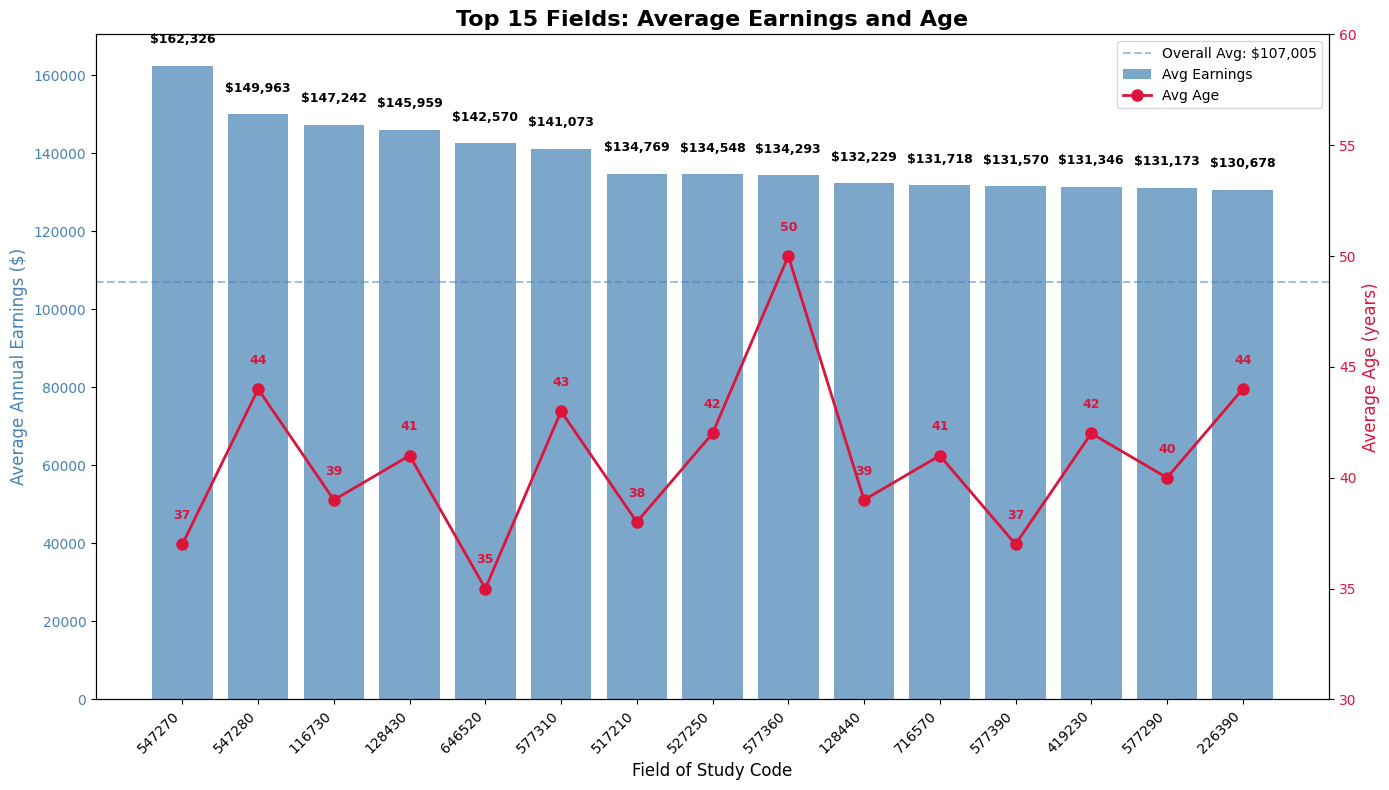

In [18]:
# Calculate field statistics
field_stats = df_clean_99.groupby('N2BAMED').agg({
    'EARN': ['mean', 'median', 'std'],
    'AGE': ['mean', 'median']
}).round(0)

# Flatten column names to make them easier to work with (df['EARN_mean'] not df['EARN']['mean'])
field_stats.columns = ['_'.join(col).strip() for col in field_stats.columns.values]
field_stats = field_stats.reset_index()

# Get top 15 fields by mean earnings (with at least 30 respondents)
field_counts = df_clean_99['N2BAMED'].value_counts()
field_stats['count'] = field_stats['N2BAMED'].map(field_counts)
field_stats = field_stats[field_stats['count'] >= 30].sort_values('EARN_mean', ascending=False).head(15)

print("Top 15 fields by average earnings:")
print(field_stats[['N2BAMED', 'EARN_mean', 'AGE_mean', 'count']])

# Create figure with two y-axes
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar chart for earnings
x_pos = range(len(field_stats))
bars = ax1.bar(x_pos, field_stats['EARN_mean'], color='steelblue', alpha=0.7, label='Avg Earnings')

# Add earnings labels
for i, (_, row) in enumerate(field_stats.iterrows()):
    ax1.text(i, row['EARN_mean'] + 5000, f'${row["EARN_mean"]:,.0f}', 
             ha='center', va='bottom', fontsize=9, fontweight='bold')

ax1.set_xlabel('Field of Study Code', fontsize=12)
ax1.set_ylabel('Average Annual Earnings ($)', fontsize=12, color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(field_stats['N2BAMED'], rotation=45, ha='right')
ax1.axhline(y=df_clean_99['EARN'].mean(), color='steelblue', linestyle='--', alpha=0.5, 
            label=f'Overall Avg: ${df_clean_99["EARN"].mean():,.0f}')

# Create second y-axis for age
ax2 = ax1.twinx()
line = ax2.plot(x_pos, field_stats['AGE_mean'], color='crimson', marker='o', 
                linewidth=2, markersize=8, label='Avg Age')
ax2.set_ylabel('Average Age (years)', fontsize=12, color='crimson')
ax2.tick_params(axis='y', labelcolor='crimson')
ax2.set_ylim(30, 60)

# Add age labels
for i, (_, row) in enumerate(field_stats.iterrows()):
    ax2.text(i, row['AGE_mean'] + 1, f'{row["AGE_mean"]:.0f}', 
             ha='center', va='bottom', fontsize=9, color='crimson', fontweight='bold')

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.title('Top 15 Fields: Average Earnings and Age', fontsize=16, fontweight='bold')
plt.tight_layout()

Top 15 fields by average earnings:
                       short_name  EARN_mean  AGE_mean  count
60   Computer engineering and ...   162326.0      37.0   1250
61   Electrical electronics an...   149963.0      44.0   4139
1              Computer science     147242.0      39.0   3262
7           Operations research     145959.0      41.0     47
97            Actuarial science     142570.0      35.0    151
68          Engineering general     141073.0      43.0    135
56   Aerospace aeronautical an...   134769.0      38.0    616
57         Chemical engineering     134548.0      42.0   1649
70   Metallurgical engineering...   134293.0      50.0     61
8                    Statistics     132229.0      39.0    289
103        Financial management     131718.0      41.0    551
72          Nuclear engineering     131570.0      37.0     90
36                    Economics     131346.0      42.0   2259
66   Engineering sciences mech...   131173.0      40.0    208
22   Pharmacology human and an...  

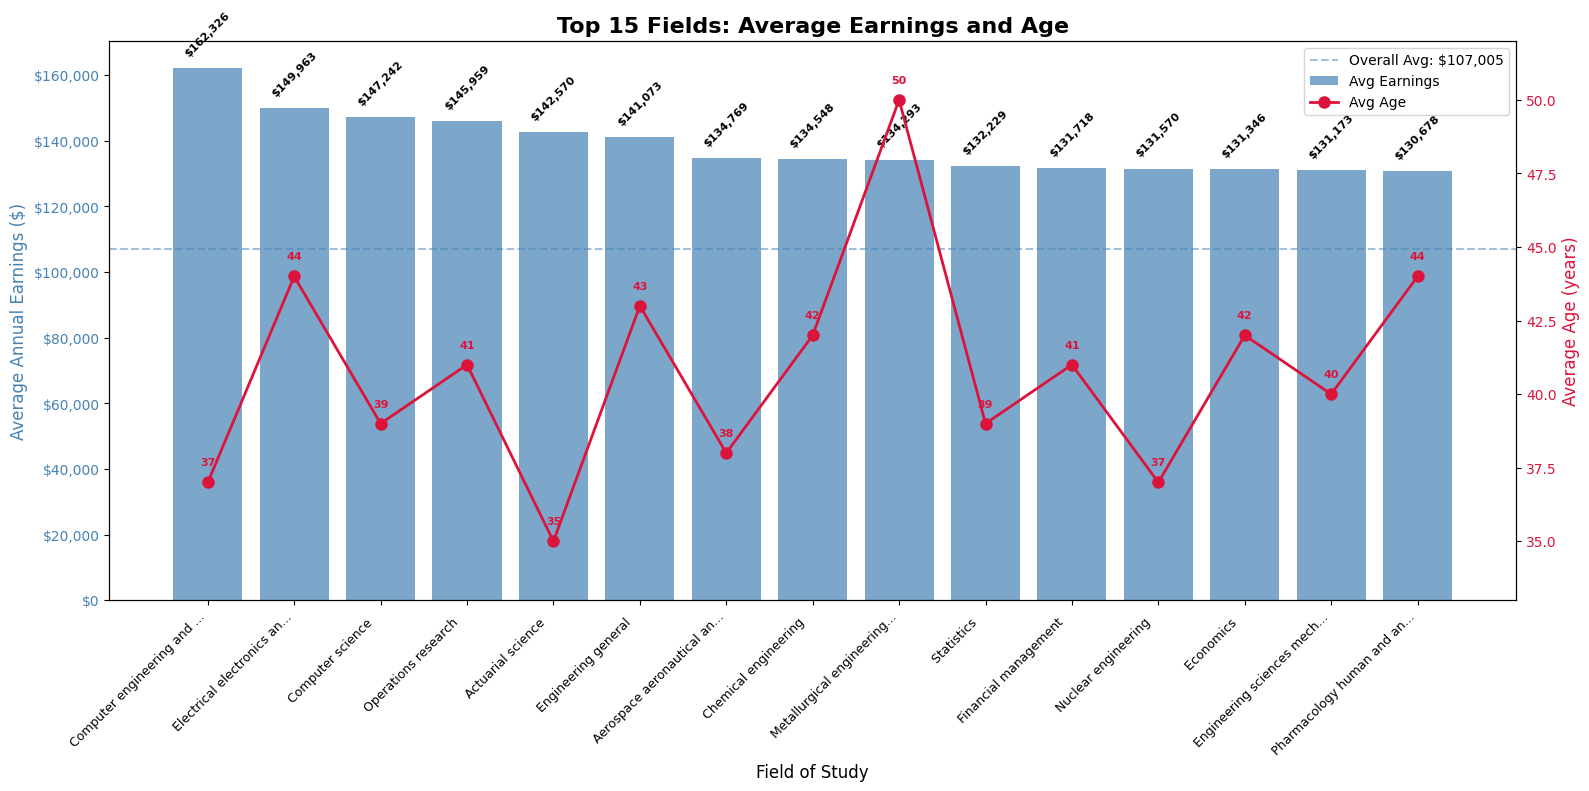


TOP 15 HIGHEST-PAYING FIELDS
 1. Computer engineering and systems engineering                           $ 162,326  Age: 37  (n=1,250)
 2. Electrical electronics and communications engineering                  $ 149,963  Age: 44  (n=4,139)
 3. Computer science                                                       $ 147,242  Age: 39  (n=3,262)
 4. Operations research                                                    $ 145,959  Age: 41  (n=47)
 5. Actuarial science                                                      $ 142,570  Age: 35  (n=151)
 6. Engineering general                                                    $ 141,073  Age: 43  (n=135)
 7. Aerospace aeronautical and astronautical/ space engineering            $ 134,769  Age: 38  (n=616)
 8. Chemical engineering                                                   $ 134,548  Age: 42  (n=1,649)
 9. Metallurgical engineering                                              $ 134,293  Age: 50  (n=61)
10. Statistics                       

In [19]:
# Recreate the plot with field names instead of codes on the x-axis

# Load field mapping
N2BAMED_df = pd.read_csv('N2BAMED.csv')
field_mapping = dict(zip(N2BAMED_df.iloc[:, 0], N2BAMED_df.iloc[:, 1]))

# Calculate field statistics
field_stats = df_clean_99.groupby('N2BAMED').agg({
    'EARN': ['mean', 'median', 'std'],
    'AGE': ['mean', 'median']
}).round(0)

# Flatten column names to make them easier to work with (df['EARN_mean'] not df['EARN']['mean'])
field_stats.columns = ['_'.join(col).strip() for col in field_stats.columns.values]
field_stats = field_stats.reset_index()

# Get top 15 fields by mean earnings (with at least 30 respondents)
field_counts = df_clean_99['N2BAMED'].value_counts()
field_stats['count'] = field_stats['N2BAMED'].map(field_counts)
field_stats = field_stats[field_stats['count'] >= 30].sort_values('EARN_mean', ascending=False).head(15)

# Add field names from mapping
field_stats['field_name'] = field_stats['N2BAMED'].map(field_mapping)

# Create shortened names for display (max 25 chars to fit on x-axis)
field_stats['short_name'] = field_stats['field_name'].apply(
    lambda x: x[:25] + '...' if len(str(x)) > 25 else str(x)
)

print("Top 15 fields by average earnings:")
print(field_stats[['short_name', 'EARN_mean', 'AGE_mean', 'count']])

# Create figure with two y-axes
fig, ax1 = plt.subplots(figsize=(16, 8))  # Wider figure for longer names

# Bar chart for earnings
x_pos = range(len(field_stats))
bars = ax1.bar(x_pos, field_stats['EARN_mean'], color='steelblue', alpha=0.7, label='Avg Earnings')

# Add earnings labels
for i, (_, row) in enumerate(field_stats.iterrows()):
    ax1.text(i, row['EARN_mean'] + 3000, f'${row["EARN_mean"]:,.0f}', 
             ha='center', va='bottom', fontsize=8, rotation=45, fontweight='bold')

ax1.set_xlabel('Field of Study', fontsize=12)
ax1.set_ylabel('Average Annual Earnings ($)', fontsize=12, color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(field_stats['short_name'], rotation=45, ha='right', fontsize=9)
ax1.axhline(y=df_clean_99['EARN'].mean(), color='steelblue', linestyle='--', alpha=0.5, 
            label=f'Overall Avg: ${df_clean_99["EARN"].mean():,.0f}')

# Format y-axis as currency
import matplotlib.ticker as mtick
ax1.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Create second y-axis for age
ax2 = ax1.twinx()
line = ax2.plot(x_pos, field_stats['AGE_mean'], color='crimson', marker='o', 
                linewidth=2, markersize=8, label='Avg Age')
ax2.set_ylabel('Average Age (years)', fontsize=12, color='crimson')
ax2.tick_params(axis='y', labelcolor='crimson')

# Dynamic age limits based on data (more flexible than hardcoded 30-60)
age_min = max(30, field_stats['AGE_mean'].min() - 2)
age_max = min(60, field_stats['AGE_mean'].max() + 2)
ax2.set_ylim(age_min, age_max)

# Add age labels
for i, (_, row) in enumerate(field_stats.iterrows()):
    ax2.text(i, row['AGE_mean'] + 0.5, f'{row["AGE_mean"]:.0f}', 
             ha='center', va='bottom', fontsize=8, color='crimson', fontweight='bold')

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.title('Top 15 Fields: Average Earnings and Age', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Print a clean table for reference
print("\n" + "="*100)
print("TOP 15 HIGHEST-PAYING FIELDS")
print("="*100)
for i, (_, row) in enumerate(field_stats.iterrows(), 1):
    print(f"{i:2d}. {row['field_name'][:70]:70} ${row['EARN_mean']:>8,.0f}  Age: {row['AGE_mean']:2.0f}  (n={int(row['count']):,})")
print("="*100)

## Conclusion: Summary of Issues Encountered and Solved

### Data Quality Issues

| # | Issue | Problem | Solution |
|---|-------|---------|----------|
| 1 | **Earnings Outliers** | Found impossible earnings values (up to $9,999,998) - looks like placeholders; still saw suspicious $1.5M earnings after initial cleaning | Created `df_clean_99` by removing top 1% of earners to get realistic data |
| 2 | **Date Inconsistencies** | Potential chronological issues (degrees before birth, retirement before working) | Implemented systematic checks for temporal consistency |

### Variable Interpretation Issues

| # | Issue | Problem | Solution |
|---|-------|---------|----------|
| 3 | **Cryptic Variable Names** | Variables like `N2BAMED`,`NSCG`, `NSF`, `STEM`, `S&E`, `RESPLOC`, etc. are just codes - impossible to understand without documentation | Used the provided Excel data dictionary (`Dpcg23.csv`) and converted to CSV for easy reference |
| 4 | **Field of Study Codes** | All fields were just numbers (e.g., 766620) - meaningless to audience | Created mapping `N2BAMED.csv` (value/description) from PDF file `Ppcg23.pdf`to add actual field names |

### Visualization Challenges

| # | Issue | Problem | Solution |
|---|-------|---------|----------|
| 5 | **Dual Y-Axis Plot** | Needed to show both earnings and age for top fields; challenge making it readable with long field names | Created shortened names and widened figure |
| 6 | **Field Names Too Long** | Actual field names are very long, don't fit on x-axis | Created truncated versions (first 25-30 chars + "...") for display |
| 7 | **DataFrame Column Management** | MultiIndex columns after `groupby().agg()` made column access difficult | Flattened column names with `['_'.join(col) for col in columns]` |

### Technical Issues

| # | Issue | Problem | Solution |
|---|-------|---------|----------|
| 8 | **File Path Problems** | `FileNotFoundError` when trying to read data | Checked current directory and used correct paths |
| 9 | **Package Installation** | `matplotlib`, and `seaborn` not installed | Used `pip` to install required packages |
| 10 | **SettingWithCopyWarning** | Pandas warning when modifying DataFrame slices | Used `.copy()` to create explicit copies |

Credits: 
I needed help on create a plot:

https://terriergpt.bu.edu/c/5c836c1d-d5c7-4d1c-8583-de298423e3b8